In [2]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

In [3]:
y_true = 100 +20 * np.random.randn(50)
y_true

array([ 55.76605803,  95.46681506, 110.79067762,  74.07195869,
        97.9443877 , 110.76078491,  92.59718928, 123.77942304,
        99.58714348, 118.51376201, 107.63369964, 102.59285485,
        87.29761195,  96.8567572 ,  99.21703932,  98.73648789,
        98.80216148, 101.69195103,  85.22277908,  95.08473806,
        99.33600064, 117.40569611,  75.32608482,  78.45063123,
        91.8269471 , 108.40403144,  99.58288702,  73.10428918,
       115.55555601,  63.65722037,  80.86729842, 133.51234079,
       116.32848323,  95.62598236,  34.93651513, 102.05854577,
        83.57438446, 103.76516179, 105.7823314 , 131.87094338,
       167.23485065, 117.82042524,  87.01218515, 115.24723338,
       123.28006708, 100.44309502,  92.18357646, 132.27155515,
       102.15391549,  99.03386328])

In [4]:
y_pred = y_true + 10 * np.random.randn(50)
y_pred

array([ 73.23823446,  95.11725816, 113.40055229,  58.35889674,
       108.89842497, 107.06070942,  93.09037396, 139.70256982,
        96.50118427, 131.68392252, 106.64498795, 106.33378659,
       100.57554424,  87.51610215, 105.67895949,  88.48914354,
        78.58096327, 104.93221584,  91.03349429, 102.69927631,
        95.72070113, 116.14311993,  76.22854131,  58.41991434,
        84.69978862, 112.87799385,  98.47291804,  72.64074967,
       124.6355564 ,  56.69460798,  74.98088302, 136.38839817,
       118.10738731,  89.77225479,  56.93938818, 114.25264269,
        87.38240125, 109.30747684, 102.12856872, 126.22085945,
       174.22999847, 127.44951776,  88.42027785, 106.49437956,
       120.09700851, 107.6174054 ,  75.67565198, 123.68111452,
       100.67050461, 108.21634841])

In [5]:
results = pd.DataFrame({'y_true': y_true, 'y_pred': y_pred})
results.head()

,y_true,y_pred
0,55.766058,73.238234
1,95.466815,95.117258
2,110.790678,113.400552
3,74.071959,58.358897
4,97.944388,108.898425


In [6]:
results['error'] = results['y_true'] - results['y_pred']
results.head()

,y_true,y_pred,error
0,55.766058,73.238234,-17.472176
1,95.466815,95.117258,0.349557
2,110.790678,113.400552,-2.609875
3,74.071959,58.358897,15.713062
4,97.944388,108.898425,-10.954037


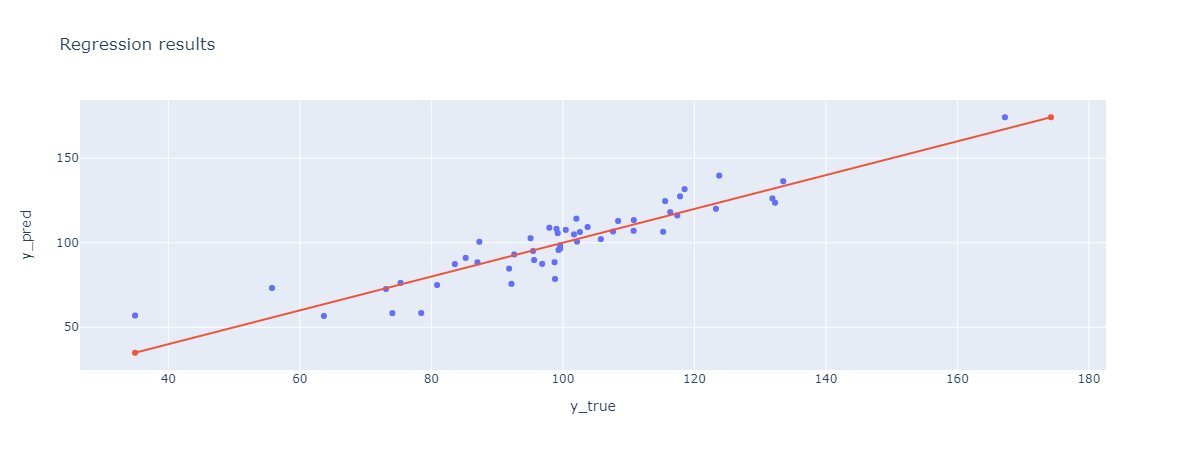

In [10]:
def plot_regression_results(y_true, y_pred):
    results = pd.DataFrame({'y_true': y_true, 'y_pred': y_pred})
    min = results[['y_true', 'y_pred']].min().min()
    max = results[['y_true', 'y_pred']].max().max()
    
    fig = go.Figure(data=[go.Scatter(x=results['y_true'], y=results['y_pred'], mode='markers'),
                         go.Scatter(x=[min, max], y=[min, max])],
                   layout=go.Layout(showlegend=False,
                                   xaxis_title='y_true',
                                   yaxis_title='y_pred',
                                   title='Regression results'))
    fig.show()
plot_regression_results(y_true, y_pred)

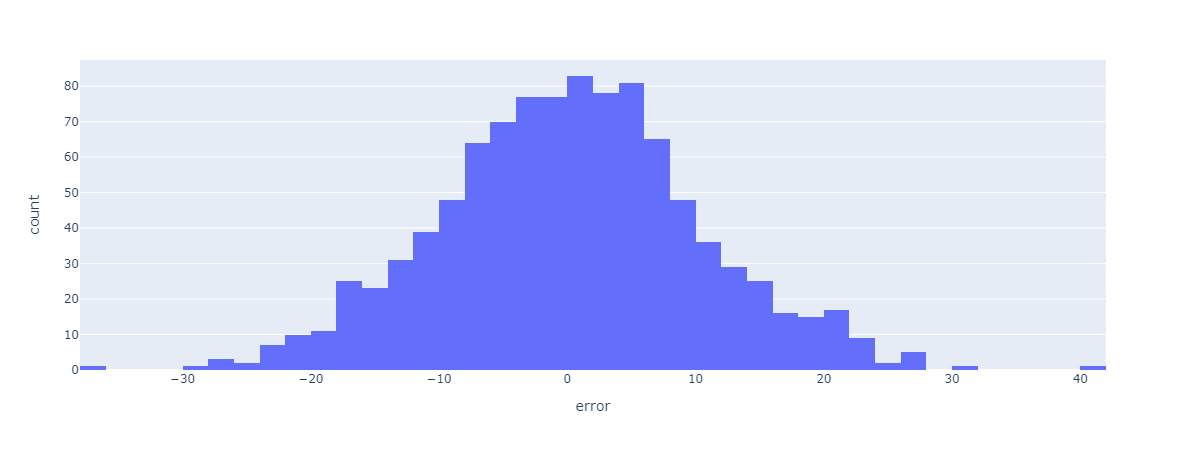

In [17]:
y_true = 100 + 20 * np.random.randn(1000)
y_pred = y_true + 10 * np.random.randn(1000)
results = pd.DataFrame({'y_true': y_true, 'y_pred': y_pred})
results['error'] = results['y_true'] - results['y_pred']

px.histogram(results, x='error', nbins=50, width=800)

In [20]:
#mean Absolute Error (MAE) -Średni błąd bezwzględny
def mean_absolute_error(y_true, y_pred):
    return abs(y_true - y_pred).sum() / len(y_true)

mean_absolute_error(y_true, y_pred)

8.010882572551964

In [21]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_true, y_pred)

8.010882572551964

In [23]:
#Mean squared Error (MSE) - Błąd średniokwadratowy
def mean_squared_error(y_true, y_pred):
    return ((y_true - y_pred) ** 2).sum() / len(y_true)
mean_squared_error(y_true, y_pred)

103.9160704164471

In [24]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_true, y_pred)

103.9160704164471

In [25]:
# Root Mean Squared Error (RMSE) - Pierwiastek błędu średniokwadratowego
def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(((y_true - y_pred) ** 2).sum() / len(y_true))
root_mean_squared_error(y_true, y_pred)

10.193923210248697

In [26]:
#Max error - błąd maksymalny
def max_error(y_true, y_pred):
    return abs(y_true - y_pred).max()
max_error(y_true, y_pred)

41.56515882789233

In [28]:
from sklearn.metrics import max_error
max_error(y_true, y_pred)

41.56515882789233

In [29]:
#R2 score - współczynnik determinacji

from sklearn.metrics import r2_score

r2_score(y_true, y_pred)

0.748397136344637

In [32]:
def r2_score(y_true, y_pred):
    numerator = ((y_true - y_pred) ** 2).sum()
    denominator = ((y_true - y_pred.mean()) ** 2).sum()
    try:
        r2 = 1-numerator / denominator
    except ZeroDivisionError:
            print('Dzielenie przez zero')
    return r2

In [33]:
r2_score(y_true, y_pred)

0.7484298428920076